In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [5]:
df_train=pd.read_csv("datos.csv", sep=",")
df_test=pd.read_csv("resultados.csv", sep=",")

/Users/mateoesses/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df_train.columns

Index(['averageRating', 'numVotes', 'titleType', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres_x', 'directors', 'writers',
       'seasonNumber', 'episodeNumber', 'ordering', 'language', 'types',
       'attributes', 'isOriginalTitle', 'adult', 'budget', 'genres_y',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'video', 'id'],
      dtype='object')

In [7]:
df_train.shape

(900000, 32)

In [8]:
df_train.dtypes

averageRating           float64
numVotes                  int64
titleType                object
isAdult                 float64
startYear                object
endYear                  object
runtimeMinutes           object
genres_x                 object
directors                object
writers                  object
seasonNumber             object
episodeNumber            object
ordering                float64
language                 object
types                    object
attributes               object
isOriginalTitle         float64
adult                    object
budget                  float64
genres_y                 object
original_language        object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
status                   object
tagline                  object
video                    object
id      

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   averageRating         900000 non-null  float64
 1   numVotes              900000 non-null  int64  
 2   titleType             899998 non-null  object 
 3   isAdult               899998 non-null  float64
 4   startYear             899998 non-null  object 
 5   endYear               899998 non-null  object 
 6   runtimeMinutes        899998 non-null  object 
 7   genres_x              899997 non-null  object 
 8   directors             899998 non-null  object 
 9   writers               899998 non-null  object 
 10  seasonNumber          403675 non-null  object 
 11  episodeNumber         403675 non-null  object 
 12  ordering              341292 non-null  float64
 13  language              341292 non-null  object 
 14  types                 341292 non-null  object 
 15  

<AxesSubplot:xlabel='ordering'>

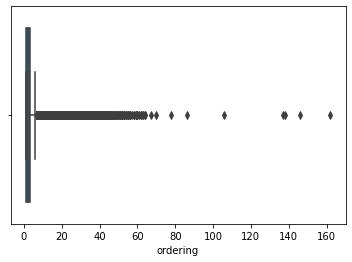

In [10]:
sns.boxplot(x=df_test["ordering"])

In [11]:
df_test = df_test.drop(df_test[df_test['ordering']>=100].index)

<AxesSubplot:xlabel='runtime'>

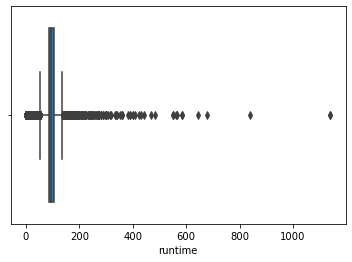

In [12]:
sns.boxplot(x=df_test["runtime"])

In [57]:
df_test = df_test.drop(df_test[df_test['runtime']>=800].index)

<AxesSubplot:xlabel='budget'>

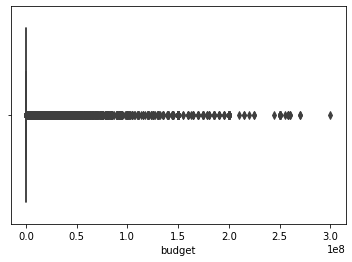

In [54]:
sns.boxplot(x=df_test["budget"])

<AxesSubplot:xlabel='revenue'>

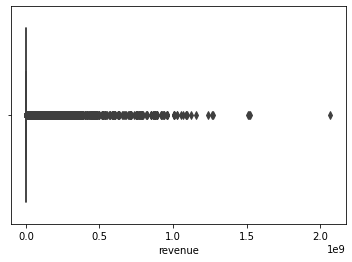

In [55]:
sns.boxplot(x=df_test["revenue"])

<AxesSubplot:xlabel='startYear'>

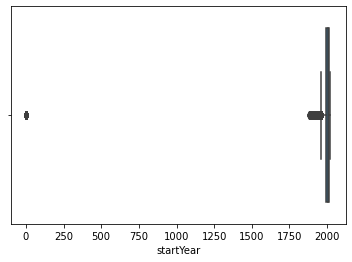

In [58]:
sns.boxplot(x=df_test["startYear"])

In [19]:
df_test = df_test.drop(df_test[df_test['startYear']>=1960].index)

<AxesSubplot:xlabel='endYear'>

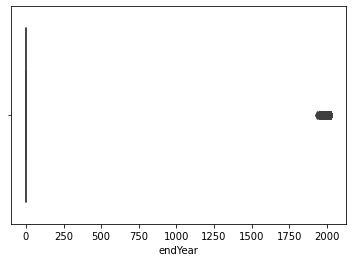

In [60]:
sns.boxplot(x=df_test["endYear"])

In [61]:
df_test = df_test.drop(df_test[df_test['endYear']>=1960].index)

In [22]:
#Elimino los NA de las variables continuas
contin_vars = ['numVotes', 'runtimeMinutes', 'budget', 'revenue', 'startYear','endYear','popularity','runtime','ordering']
for v in contin_vars: df_train.loc[df_train[v].isnull(), v] = 0
for v in contin_vars: df_train.loc[(df_train[v].isna()), v] = 0

In [23]:
#reemplazamos los vacios por 0
df_train=df_train.replace('\\N',0)
#cambiamos los type
df_train['endYear']=df_train['endYear'].astype('int16')
df_train['startYear']=df_train['startYear'].astype('int16')
df_train['prod']=df_train['endYear']-df_train['startYear']

In [24]:
df_train['runtimeMinutes']=df_train['runtimeMinutes'].replace('Game-Show',0)
df_train['runtimeMinutes']=df_train['runtimeMinutes'].astype('int16')

In [25]:
 def label_race (row, col):
    lab = {
        f[0]: 100,
        f[1]: 80,
        f[2]: 60,
        f[3]: 40,
        f[4]: 20,
    }
    return lab.get(row[col], 0)

In [26]:
f=df_train['directors'].value_counts()[1:6].index.tolist()
df_train['director_f'] = df_train.apply (lambda row: label_race(row,'directors'), axis=1)

In [27]:
f=df_train['writers'].value_counts()[1:6].index.tolist()
df_train['writers_f'] = df_train.apply (lambda row: label_race(row,'writers'), axis=1)

In [28]:
f=df_train['production_companies'].value_counts()[1:6].index.tolist()
df_train['production_companies_f'] = df_train.apply (lambda row: label_race(row,'production_companies'), axis=1)

In [29]:
f=df_train['production_countries'].value_counts()[1:6].index.tolist()
df_train['production_countries_f'] = df_train.apply (lambda row: label_race(row,'production_countries'), axis=1)

In [30]:
f=df_train['status'].value_counts()[0:5].index.tolist()
df_train['status_f'] = df_train.apply (lambda row: label_race(row,'status'), axis=1)

In [31]:
#Clasifico en categóricas y continuas
cat_vars = ['language'] 
contin_vars = ['startYear','endYear','prod', 'numVotes', 'runtimeMinutes', 'director_f', 'production_companies_f', 'production_countries_f','status_f','popularity','runtime']

In [32]:
# Genero variables dummys con las categóricas
for v in cat_vars: df_train=df_train.join(pd.get_dummies(df_train[v], drop_first=True), lsuffix = '_left', rsuffix = '_right')

In [33]:
#Selección de variables para el modelo
algunas=contin_vars+['en', 'es']

In [34]:
df_train.head()

,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres_x,directors,writers,...,writers_f,production_companies_f,production_countries_f,status_f,en,es,fr,haw,myv,yi
0,1.8,12,tvEpisode,0.0,2014,0,21,Reality-TV,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.8,5,tvEpisode,0.0,2020,0,0,Reality-TV,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.5,35,video,0.0,2006,0,7,"Comedy,Short",nm2040572,nm2040572,...,0,0,0,0,0,0,0,0,0,0
3,4.3,11,short,0.0,2016,0,0,"Comedy,Short",nm3579598,nm2765889,...,0,0,0,0,0,0,0,0,0,0
4,7.4,10,tvEpisode,0.0,2014,0,22,"Adventure,Animation,Fantasy",0,nm1444457,...,60,0,0,0,0,0,0,0,0,0


In [35]:
# Elegir un modelo y correrlo
reg=ExtraTreesRegressor(max_depth=25)

X=np.array(df_train[algunas])
y=df_train['averageRating']

res=reg.fit(X, y)

In [36]:
res.score(X,y)

0.33875260836458665

In [37]:
#------

In [38]:
df_test.head()

,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres_x,directors,writers,seasonNumber,...,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,video,id
0,15,video,0.0,1999,\N,3,"Music,Short",nm2897815,\N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900001
1,226,tvEpisode,0.0,2007,\N,13,"Comedy,Fantasy,Sci-Fi",nm3005544,nm3005544,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900002
2,98,tvEpisode,0.0,1971,\N,60,Western,nm0568535,"nm0588513,nm0531990,nm0582307,nm0912766",16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900003
3,22,tvSeries,0.0,2001,\N,\N,Documentary,"nm1234625,nm0823288","nm0823288,nm1234625",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900004
4,48,tvEpisode,0.0,2014,\N,47,"Crime,Drama,Mystery",nm1788073,"nm0937725,nm0382985,nm0049569",8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900005


In [39]:
df_test.columns

Index(['numVotes', 'titleType', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres_x', 'directors', 'writers', 'seasonNumber',
       'episodeNumber', 'ordering', 'language', 'types', 'attributes',
       'isOriginalTitle', 'adult', 'budget', 'genres_y', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'video', 'id'],
      dtype='object')

In [40]:
#Elimino los NA de las variables continuas
contin_vars = ['numVotes', 'runtimeMinutes', 'budget', 'revenue', 'startYear','endYear','popularity','runtime']
for v in contin_vars: df_test.loc[df_test[v].isnull(), v] = 0
for v in contin_vars: df_test.loc[(df_test[v].isna()), v] = 0

In [41]:
#reemplazamos los vacios por 0
df_test=df_test.replace('\\N',0)
#cambiamos los type
df_test['endYear']=df_test['endYear'].astype('int16')
df_test['startYear']=df_test['startYear'].astype('int16')
df_test['prod']=df_test['endYear']-df_test['startYear']

In [42]:
df_test['runtimeMinutes']=df_test['runtimeMinutes'].replace('Reality-TV',0)
df_test['runtimeMinutes']=df_test['runtimeMinutes'].astype('int16')

In [43]:
f=df_test['directors'].value_counts()[1:6].index.tolist()
df_test['director_f'] = df_test.apply (lambda row: label_race(row,'directors'), axis=1)


In [44]:
f=df_test['writers'].value_counts()[1:6].index.tolist()
df_test['writers_f'] = df_test.apply (lambda row: label_race(row,'writers'), axis=1)


In [45]:
f=df_test['production_companies'].value_counts()[1:6].index.tolist()
df_test['production_companies_f'] = df_test.apply (lambda row: label_race(row,'production_companies'), axis=1)


In [46]:
f=df_test['production_countries'].value_counts()[1:6].index.tolist()
df_test['production_countries_f'] = df_test.apply (lambda row: label_race(row,'production_countries'), axis=1)


In [47]:
f=df_test['status'].value_counts()[0:5].index.tolist()
df_test['status_f'] = df_test.apply (lambda row: label_race(row,'status'), axis=1)


In [48]:
cat_vars = ['language'] 
contin_vars = ['startYear','endYear','prod', 'numVotes', 'runtimeMinutes', 'director_f', 'production_companies_f', 'production_countries_f','status_f','popularity','runtime']

In [49]:
# Genero variables dummys con las categóricas
for v in cat_vars: df_test=df_test.join(pd.get_dummies(df_test[v], drop_first=True), lsuffix = '_left', rsuffix = '_right')

In [50]:
algunas=contin_vars+['en', 'es']

In [51]:
df_test.head()

,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres_x,directors,writers,seasonNumber,...,prod,director_f,writers_f,production_companies_f,production_countries_f,status_f,en,es,hi,yi
0,15,video,0.0,1999,0,3,"Music,Short",nm2897815,0,NaN,...,-1999,0,0,0,0,0,0,0,0,0
1,226,tvEpisode,0.0,2007,0,13,"Comedy,Fantasy,Sci-Fi",nm3005544,nm3005544,2,...,-2007,20,100,0,0,0,0,0,0,0
2,98,tvEpisode,0.0,1971,0,60,Western,nm0568535,"nm0588513,nm0531990,nm0582307,nm0912766",16,...,-1971,0,0,0,0,0,0,0,0,0
3,22,tvSeries,0.0,2001,0,0,Documentary,"nm1234625,nm0823288","nm0823288,nm1234625",NaN,...,-2001,0,0,0,0,0,0,0,0,0
4,48,tvEpisode,0.0,2014,0,47,"Crime,Drama,Mystery",nm1788073,"nm0937725,nm0382985,nm0049569",8,...,-2014,0,0,0,0,0,0,0,0,0


In [62]:
# Y hago una predicción con las variables de testeo
X=np.array(df_test[algunas])
resultado=reg.predict(X)

ValueError: X has 13 features, but ExtraTreeRegressor is expecting 14 features as input.

In [ ]:
# Finalmente generar un CSV con los resultados aplicados al CSV de resultados que no contiene la columna target

salida = pd.DataFrame(data={"averageRating": resultado}).astype(str)
salida.index = df_test.id
salida.to_csv("Entrega.csv", sep=',',index=True,  index_label='id')

In [ ]:
resul=pd.read_csv("Entrega.csv", sep=",")

In [ ]:
res.score(X,resul.averageRating)